In [126]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [368]:
def OriginalDataGet():
    data = pd.read_csv("Data/AER_credit_card_data.csv")
    data['card']=data["card"].map({"yes":1, "no":0})
    data["selfemp"]=data['selfemp'].map({"yes":1, "no":0})
    data["owner"]=data['owner'].map({"yes":1, "no":0})
    return data

In [144]:
Original_data = OriginalDataGet()

高斯分布分析

In [145]:
def PlotGaussian(mean0, std0, label, color, X):
    sigma = np.sqrt(std0)
    #x = np.linspace(mean0 - 3*sigma, mean0 + 3*sigma, 100)#隨機從中取100個值當變量 根據三西格瑪原則
    X = np.sort(X[(X>=(mean0-3*sigma)) & (X<=(mean0+3*sigma))])
    #1/(std*根號(2pi))*(自然數)**((-1/2)*((x-mean)/std)**2)
    y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布
    plt.plot(X, y, label=f'{label}', color=color)

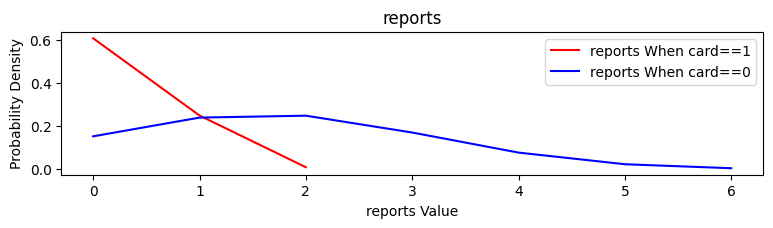

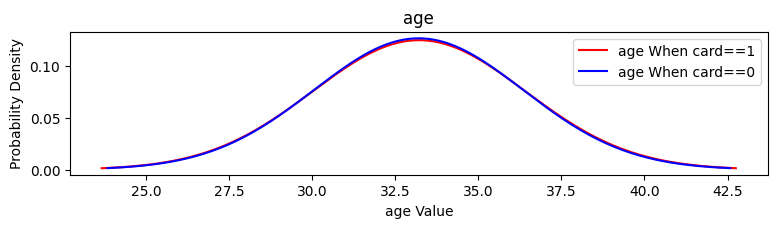

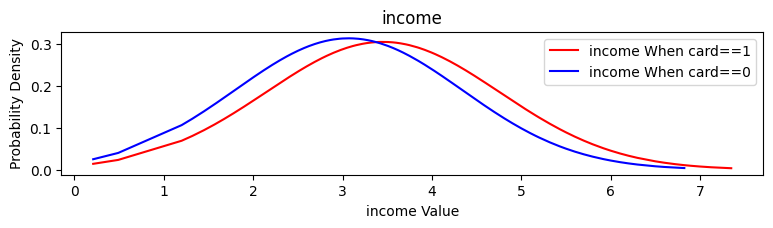

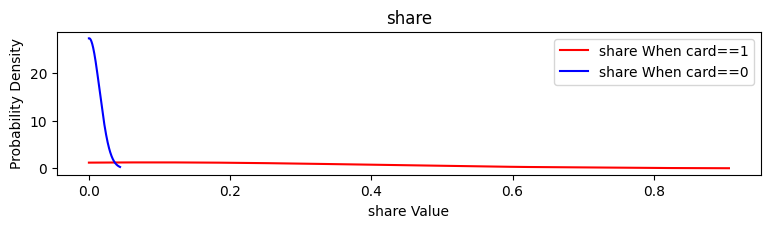

C:\Users\RCK\AppData\Local\Temp\ipykernel_8248\2595208412.py:6: RuntimeWarning: divide by zero encountered in scalar divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布
C:\Users\RCK\AppData\Local\Temp\ipykernel_8248\2595208412.py:6: RuntimeWarning: invalid value encountered in divide
  y = (1 / (sigma * np.sqrt(2 * np.pi))) * np.exp(-0.5 * ((X - mean0)/ sigma) ** 2)#高斯分布


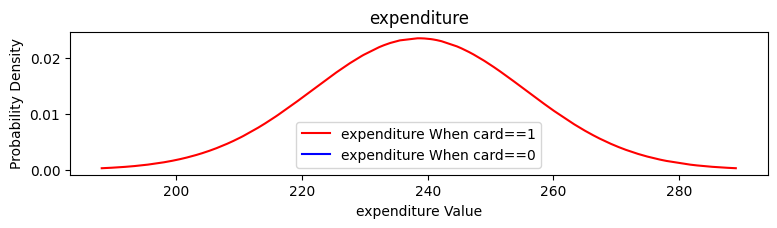

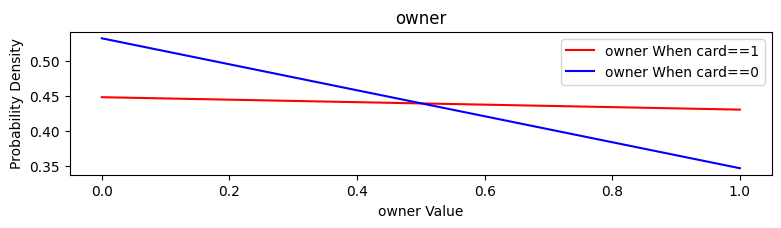

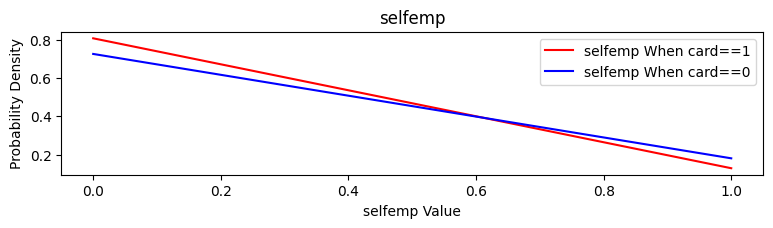

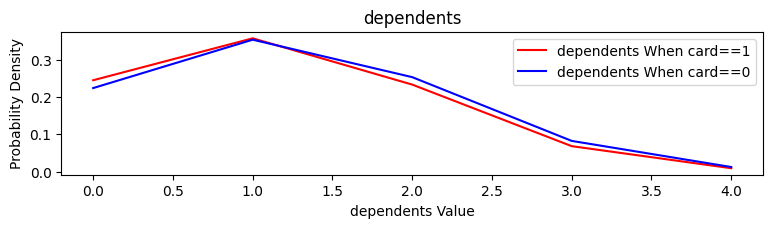

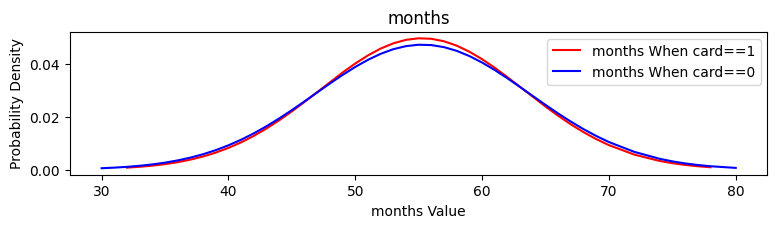

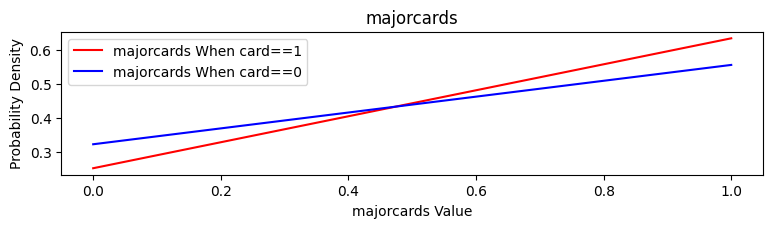

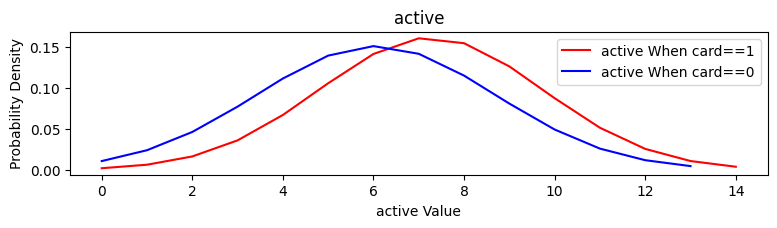

In [146]:
for n in Original_data.iloc[:,1:].columns:
    plt.figure(figsize=(15, 10))
    plt.subplot(5, 2, 1)
    PlotGaussian(Original_data[n][Original_data["card"]==1].mean(), Original_data[n][Original_data["card"]==1].std(), f'{n} When card==1', 'red', Original_data[n])
    PlotGaussian(Original_data[n][Original_data["card"]==0].mean(), Original_data[n][Original_data["card"]==0].std(), f'{n} When card==0', 'blue', Original_data[n])
    plt.title(n)
    plt.xlabel(f'{n} Value')
    plt.ylabel('Probability Density')
    plt.legend()

    plt.tight_layout()
    #plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=1, hspace=1)
    plt.show()
    #plt.savefig(r"D:\Github\Issue_Credit_Card\PlotGaussian.png")

In [371]:
name1 = "Data/Data1.csv"
data1 = pd.read_csv(name1)
target1 = data1["核卡狀況"]
feature_df1 = data1.iloc[:,1:]

name2 = "Data/Data2.csv"
data2 = pd.read_csv(name2)
target2 = data2["card"]
feature_df2 = data2.iloc[:,2:]

計算皮爾森相關系數

In [155]:
print(feature_df1.iloc[:,0:5].corr())

               聯徵紀錄        年齡       年收入       收支比  每月信用卡支出平均
聯徵紀錄       1.000000  0.041092  0.010545 -0.158574  -0.136273
年齡         0.041092  1.000000  0.330621 -0.115166   0.017075
年收入        0.010545  0.330621  1.000000 -0.053676   0.281571
收支比       -0.158574 -0.115166 -0.053676  1.000000   0.838731
每月信用卡支出平均 -0.136273  0.017075  0.281571  0.838731   1.000000


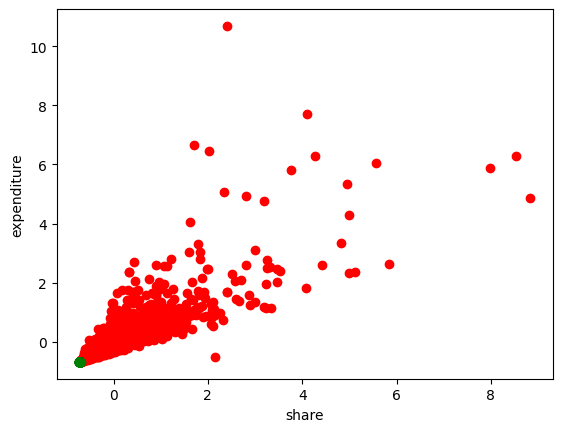

In [158]:

plt.scatter(feature_df1.iloc[:, 3][target1==1], feature_df1.iloc[:, 4][target1==1], c="r")
plt.scatter(feature_df1.iloc[:, 3][target1==0], feature_df1.iloc[:, 4][target1==0], c="g")
plt.xlabel("share")
plt.ylabel("expenditure")
plt.show()

模型訓練

In [329]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB , BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn import metrics

混淆矩陣預備評估預測好壞

In [159]:
def matrix(true, pre):#混淆矩陣
    f = metrics.f1_score(true, pre)
    pre_score = metrics.precision_score(true, pre)
    re_score = metrics.recall_score(true, pre)
    print(f"Precision: {pre_score}")
    print(f"Recall: {re_score}")
    print(f"f-measure: {f}")

分割數據

In [139]:
feature_df1.drop(["收支比","每月信用卡支出平均"], axis=1, inplace=True)

In [374]:
feature_df = feature_df1[["聯徵紀錄","年齡","年收入","扶養人數","居住時間","持有主卡","活躍帳戶","房地產_no","房地產_yes","創業人士_no","創業人士_yes"]]
feature = feature_df2.iloc[:,3:]
X_train, X_test, y_train, y_test = train_test_split(feature_df, target1, test_size=0.5)
lr = LogisticRegression()
lr.fit(X_train, y_train)
print(lr.score(X_test,y_test))
matrix(y_test, lr.predict(X_test))


0.8384146341463414
Precision: 0.8442906574394463
Recall: 0.9682539682539683
f-measure: 0.9020332717190388


c:\Users\RCK\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
